In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'synthetic_student_data_6_lakh.csv')

In [3]:
df.head()

,time_spent_weekly,quiz_score_avg,forum_posts,video_watched_percent,assignments_submitted,login_frequency,session_duration_avg,device_type,course_difficulty,region,Final_Exam_Score,Pass_Fail,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,249.816048,50.102372,1,51.363574,6,3,49.202565,Mobile,Hard,Urban,55,Pass,male,group B,associate's degree,free/reduced,none,71,55,85
1,480.285723,60.192512,1,14.031915,4,5,28.783424,Mobile,Medium,Suburban,61,Pass,female,group A,bachelor's degree,standard,completed,89,72,54
2,392.797577,96.957282,1,0.352134,4,3,32.766823,Tablet,Medium,Suburban,96,Fail,male,group D,some college,standard,none,78,76,70
3,339.463394,72.186302,1,19.282808,5,3,46.636374,Tablet,Hard,Urban,91,Pass,female,group D,master's degree,standard,completed,93,98,94
4,162.407456,56.116318,0,18.540546,8,2,37.316403,Desktop,Easy,Rural,79,Pass,female,group A,master's degree,free/reduced,completed,59,56,66


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   time_spent_weekly            600000 non-null  float64
 1   quiz_score_avg               600000 non-null  float64
 2   forum_posts                  600000 non-null  int64  
 3   video_watched_percent        600000 non-null  float64
 4   assignments_submitted        600000 non-null  int64  
 5   login_frequency              600000 non-null  int64  
 6   session_duration_avg         600000 non-null  float64
 7   device_type                  600000 non-null  object 
 8   course_difficulty            600000 non-null  object 
 9   region                       600000 non-null  object 
 10  Final_Exam_Score             600000 non-null  int64  
 11  Pass_Fail                    600000 non-null  object 
 12  gender                       600000 non-null  object 
 13 

In [5]:
df.describe()

,time_spent_weekly,quiz_score_avg,forum_posts,video_watched_percent,assignments_submitted,login_frequency,session_duration_avg,Final_Exam_Score,math score,reading score,writing score
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,300.062506,75.007049,1.998620,49.994875,4.501470,4.003335,44.981715,74.498318,74.519173,74.524998,74.505633
std,115.408282,14.429450,1.415794,28.880048,2.869677,1.999263,14.433983,14.436195,14.435577,14.414865,14.440912
min,100.000208,50.000025,0.000000,0.000137,0.000000,1.000000,20.000039,50.000000,50.000000,50.000000,50.000000
25%,200.070234,62.509092,1.000000,25.000122,2.000000,2.000000,32.488552,62.000000,62.000000,62.000000,62.000000
50%,300.177613,74.995584,2.000000,49.986716,4.000000,4.000000,44.968648,74.000000,75.000000,75.000000,75.000000
75%,399.902378,87.502685,3.000000,74.939795,7.000000,6.000000,57.469376,87.000000,87.000000,87.000000,87.000000
max,499.999326,99.999889,13.000000,99.999898,9.000000,7.000000,69.999985,99.000000,99.000000,99.000000,99.000000


### handle the missing values 

In [6]:
df.isnull().sum()

time_spent_weekly              0
quiz_score_avg                 0
forum_posts                    0
video_watched_percent          0
assignments_submitted          0
login_frequency                0
session_duration_avg           0
device_type                    0
course_difficulty              0
region                         0
Final_Exam_Score               0
Pass_Fail                      0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Handle the outliers

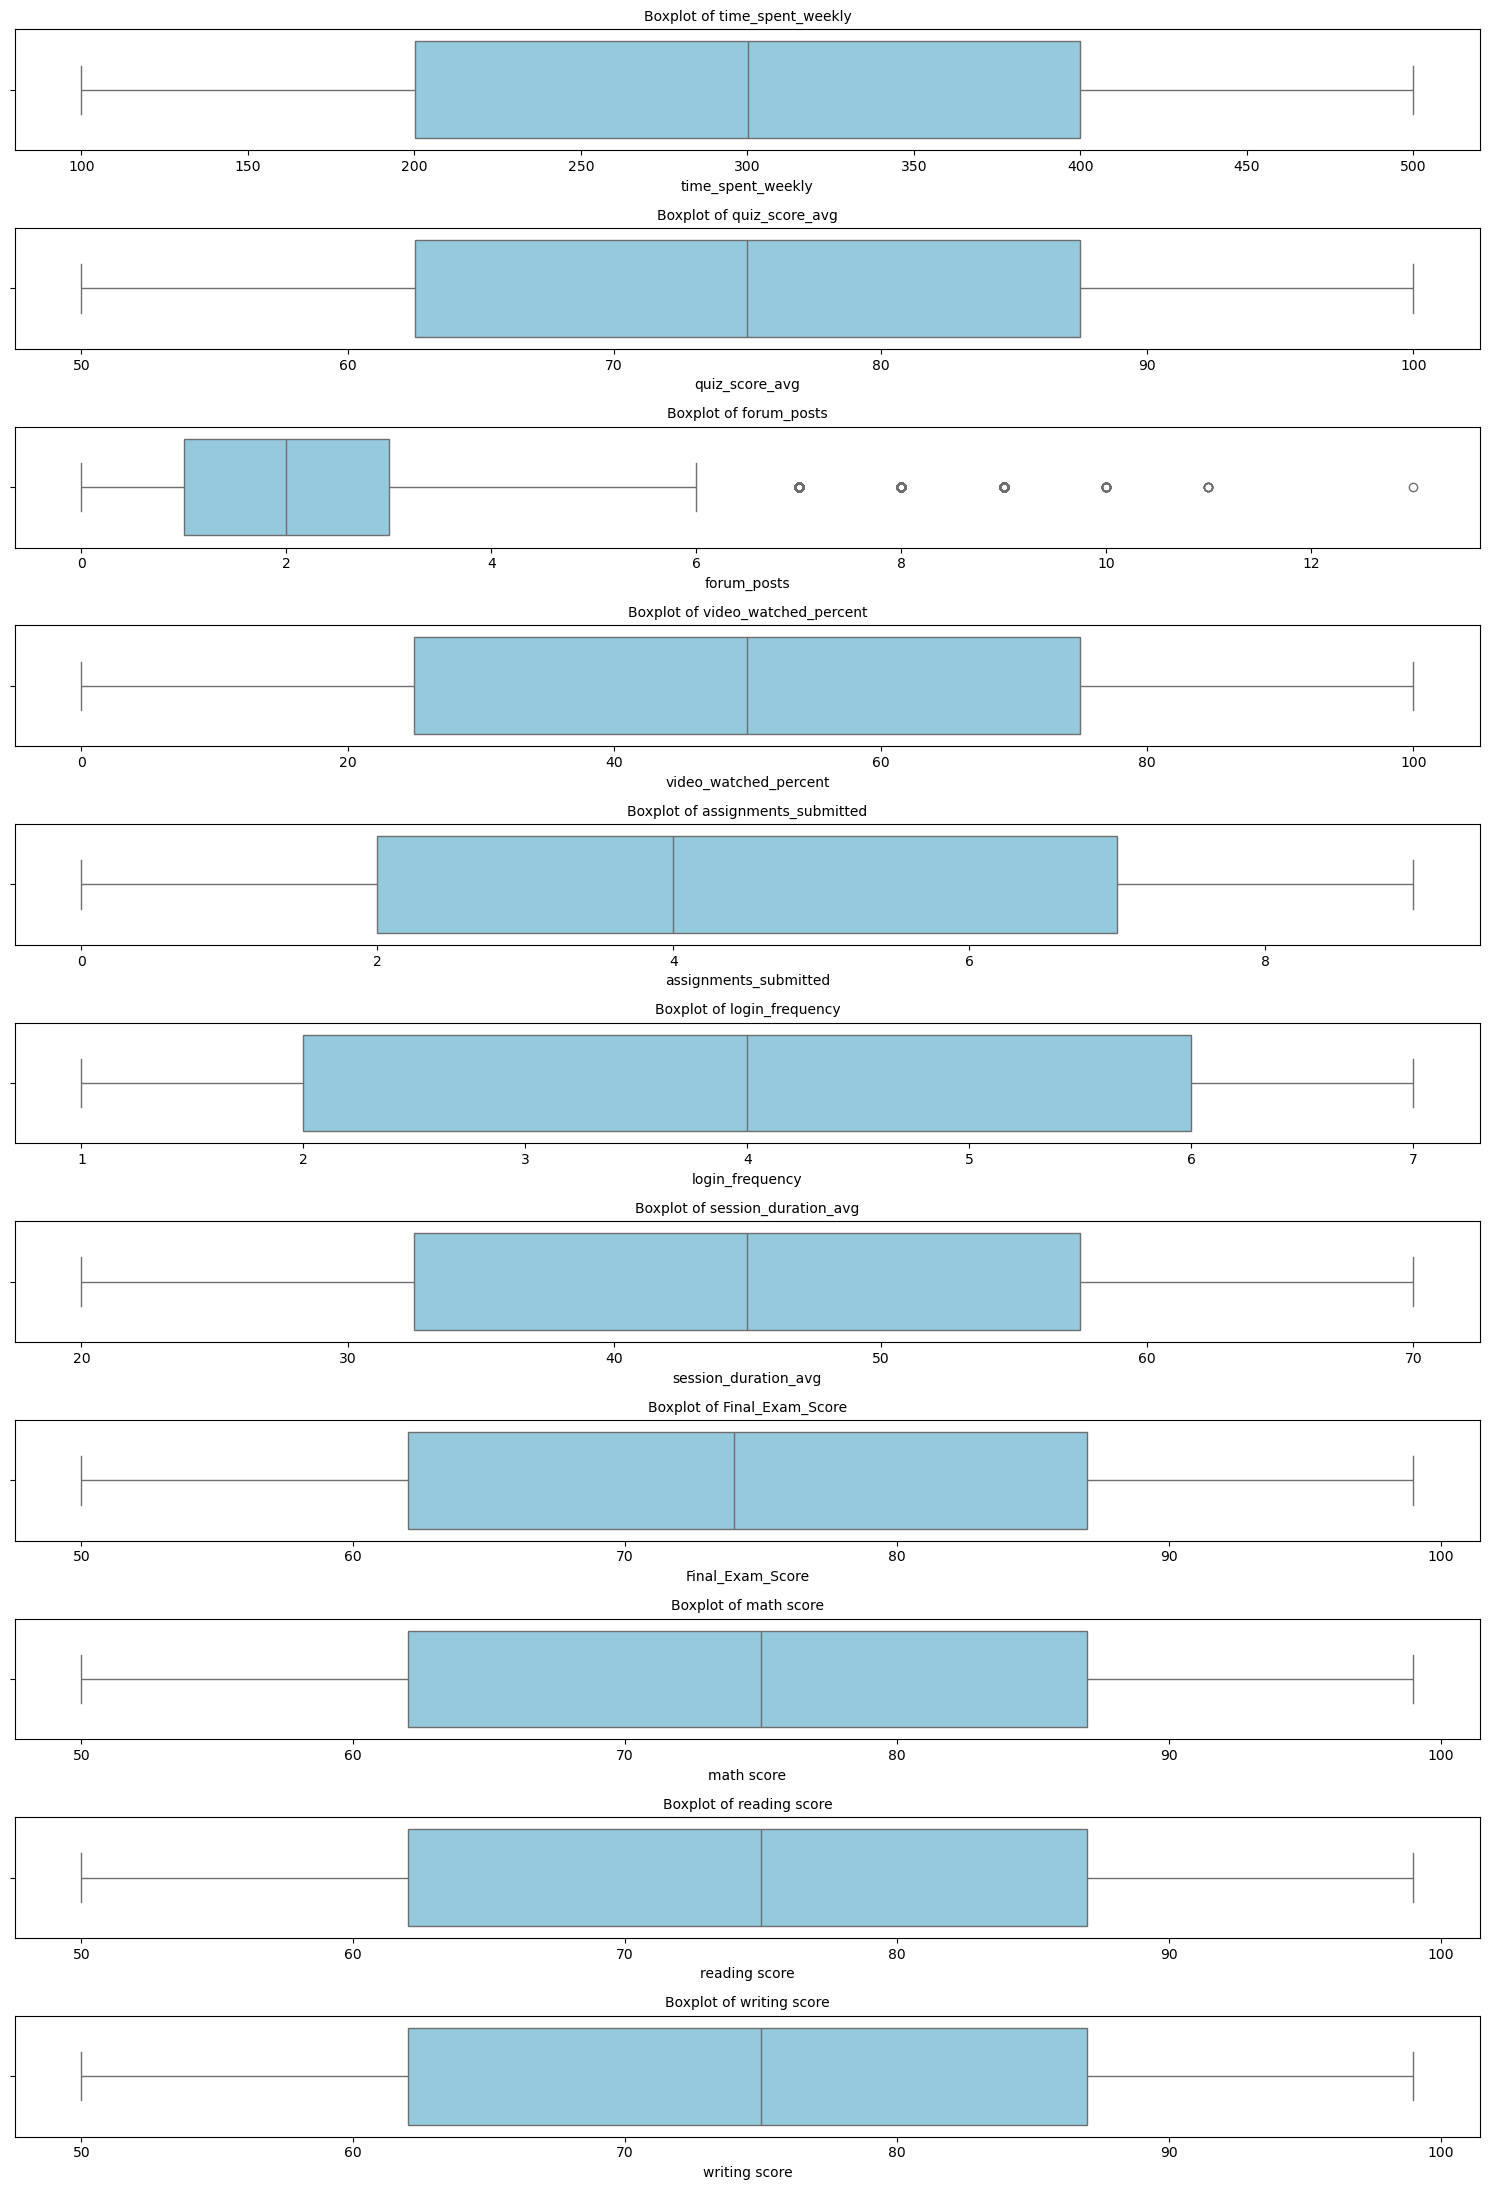

In [7]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Plot all in a grid
plt.figure(figsize=(15, len(numeric_cols) * 2))  # Adjust size

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.tight_layout()

plt.show()

### Do the Labelencoding 

In [8]:
from sklearn.preprocessing import LabelEncoder

# Loop through all object or categorical columns in df
for col in df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [9]:
df.head()

,time_spent_weekly,quiz_score_avg,forum_posts,video_watched_percent,assignments_submitted,login_frequency,session_duration_avg,device_type,course_difficulty,region,Final_Exam_Score,Pass_Fail,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,249.816048,50.102372,1,51.363574,6,3,49.202565,1,1,2,55,1,1,1,0,0,1,71,55,85
1,480.285723,60.192512,1,14.031915,4,5,28.783424,1,2,1,61,1,0,0,1,1,0,89,72,54
2,392.797577,96.957282,1,0.352134,4,3,32.766823,2,2,1,96,0,1,3,4,1,1,78,76,70
3,339.463394,72.186302,1,19.282808,5,3,46.636374,2,1,2,91,1,0,3,3,1,0,93,98,94
4,162.407456,56.116318,0,18.540546,8,2,37.316403,0,0,0,79,1,0,0,3,0,0,59,56,66


In [10]:
df.columns

Index(['time_spent_weekly', 'quiz_score_avg', 'forum_posts',
       'video_watched_percent', 'assignments_submitted', 'login_frequency',
       'session_duration_avg', 'device_type', 'course_difficulty', 'region',
       'Final_Exam_Score', 'Pass_Fail', 'gender', 'race/ethnicity',
       'parental level of education', 'lunch', 'test preparation course',
       'math score', 'reading score', 'writing score'],
      dtype='object')

### Feature selection

In [11]:
# Display the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)


                             time_spent_weekly  quiz_score_avg  forum_posts  \
time_spent_weekly                     1.000000        0.001972    -0.001413   
quiz_score_avg                        0.001972        1.000000     0.001167   
forum_posts                          -0.001413        0.001167     1.000000   
video_watched_percent                 0.000423        0.000624     0.000374   
assignments_submitted                 0.002976        0.000169     0.001473   
login_frequency                      -0.000321       -0.002141     0.002806   
session_duration_avg                 -0.000697        0.002472    -0.000462   
device_type                          -0.000330       -0.001569     0.002156   
course_difficulty                    -0.000682        0.002877     0.001583   
region                               -0.002041        0.002724    -0.001280   
Final_Exam_Score                     -0.000702       -0.000206    -0.001506   
Pass_Fail                            -0.000997      

<Axes: >

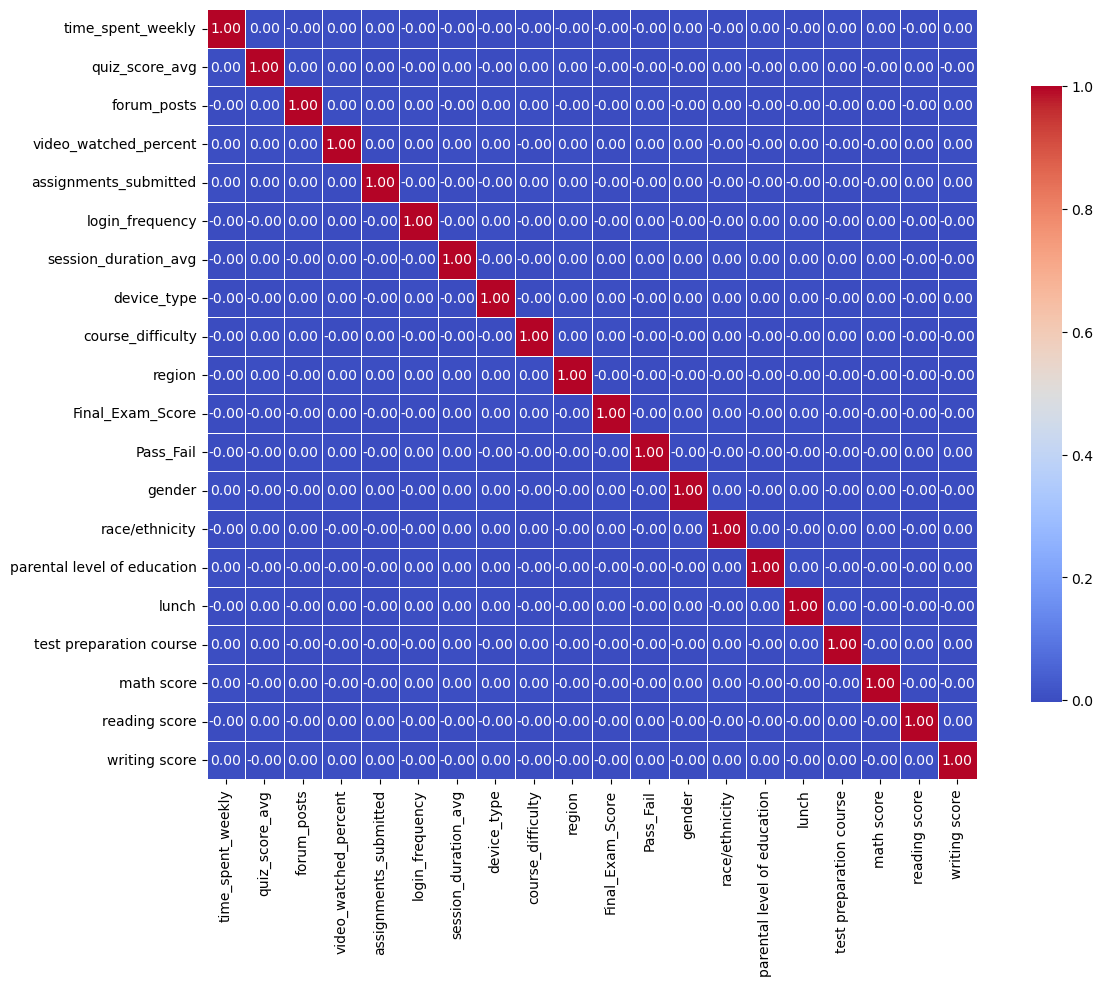

In [12]:
# Step 2: Create heatmap
plt.figure(figsize=(14, 10))  # Width, height in inches
sns.heatmap(corr_matrix,
            annot=True,        # Display correlation coefficients
            fmt=".2f",         # Format float values
            cmap="coolwarm",   # Color scale
            linewidths=0.5,    # Add lines between squares
            square=True,       # Make cells square
            cbar_kws={"shrink": 0.8})  # Shrink color bar


In [13]:
df['Dropout_Risk'] = (
    (df['quiz_score_avg'] < 60) |
    (df['Final_Exam_Score'] < 65) |
    (df['video_watched_percent'] < 30) |
    (df['assignments_submitted'] < 5) |
    (df['login_frequency'] < 3)
).astype(int)


In [17]:
features = [
    'time_spent_weekly',
    'quiz_score_avg',
    'forum_posts',
    'video_watched_percent',
    'assignments_submitted',
    'login_frequency',
    'session_duration_avg',
    'device_type',
    'course_difficulty',
    'region',
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course',
    'math score',
    'reading score',
    'writing score'
]


### Train Test Split 

In [18]:
from sklearn.model_selection import train_test_split
# Features and Target
X = df[features]
y = df['Dropout_Risk']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### XGBoostClassifier

In [19]:
from xgboost import XGBClassifier
# XGBoost Model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
# Prediction & Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.99      0.82     16746
           1       1.00      0.93      0.96    103254

    accuracy                           0.94    120000
   macro avg       0.85      0.96      0.89    120000
weighted avg       0.96      0.94      0.94    120000

Confusion Matrix:
 [[16659    87]
 [ 7066 96188]]


In [21]:
from imblearn.over_sampling import SMOTE
# 3. Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


C:\Users\Sachin Hembram\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Sachin Hembram\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in

Before SMOTE: Dropout_Risk
1    412959
0     67041
Name: count, dtype: int64
After SMOTE: Dropout_Risk
1    412959
0    412959
Name: count, dtype: int64


In [23]:
# 4. Train XGBoost on balanced (SMOTE) training data
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# 5. Evaluate on the original test set
y_pred = model.predict(X_test)

# 6. Print evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.98      0.82     16746
           1       1.00      0.93      0.96    103254

    accuracy                           0.94    120000
   macro avg       0.85      0.96      0.89    120000
weighted avg       0.96      0.94      0.94    120000

Confusion Matrix:
 [[16436   310]
 [ 6974 96280]]


### Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_resampled, y_train_resampled)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
# 2. Make predictions on the original test set
y_pred_logistic = logistic_model.predict(X_test)

# 3. Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.68      0.47     16746
           1       0.94      0.80      0.86    103254

    accuracy                           0.78    120000
   macro avg       0.65      0.74      0.67    120000
weighted avg       0.86      0.78      0.81    120000

Confusion Matrix:
 [[11434  5312]
 [20794 82460]]


### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_resampled, y_train_resampled)   

DecisionTreeClassifier(random_state=42)

In [40]:
# 2. Make predictions on the original test set
y_pred_logistic = decision_tree_model.predict(X_test)

# 3. Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74     16746
           1       0.96      0.95      0.95    103254

    accuracy                           0.92    120000
   macro avg       0.83      0.86      0.85    120000
weighted avg       0.93      0.92      0.92    120000

Confusion Matrix:
 [[13021  3725]
 [ 5537 97717]]


### Random Forest 

In [42]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [43]:
# 1. Make predictions
y_pred_rf = random_forest_model.predict(X_test)

# 2. Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82     16746
           1       1.00      0.93      0.96    103254

    accuracy                           0.94    120000
   macro avg       0.85      0.96      0.89    120000
weighted avg       0.96      0.94      0.94    120000

Confusion Matrix:
 [[16668    78]
 [ 7065 96189]]


### Gradient Boosting 

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting Model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [45]:
# 1. Make predictions
y_pred_rf = gradient_boosting_model .predict(X_test)

# 2. Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.99      0.82     16746
           1       1.00      0.93      0.96    103254

    accuracy                           0.94    120000
   macro avg       0.85      0.96      0.89    120000
weighted avg       0.96      0.94      0.94    120000

Confusion Matrix:
 [[16517   229]
 [ 6986 96268]]


In [46]:
import joblib

# Save the model
joblib.dump(model, "best_dropout_model.pkl")

['best_dropout_model.pkl']